<a href="https://colab.research.google.com/github/LoreBonora/IntroGit/blob/master/Intro_CD_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalando o Gitly

In [1]:
!pip install gitly

     |████████████████████████████████| 74.0MB 80kB/s 
     |████████████████████████████████| 13.1MB 43.9MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# Carregar bibliotecas importantes

In [2]:
import pandas as pd
import numpy as np
from gitly.colab.plot import GitlyPlotter
import plotly.express as px

#Escolhendo o renderizador dos gráficos

In [3]:
gitly = GitlyPlotter(renderer='github')

#Exemplo de gráfico com o Plotly

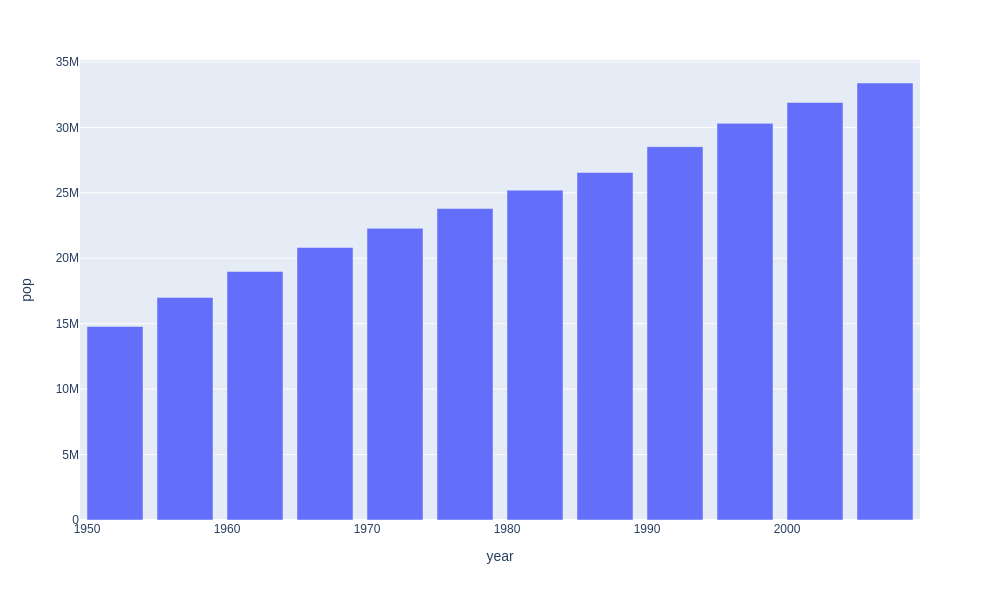

In [4]:
data_canada = px.data.gapminder().query("country == 'Canada'")

fig = px.bar(data_canada, x='year', y='pop')
gitly.show(fig, width = 1000, height = 600)

#Carregar os CSVs

In [103]:
df_clientes = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/My Drive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_sellers_dataset.csv')

#Esploração Dataset de clientes

In [6]:
#Conhecendo o dataset
df_clientes.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [7]:
#Qual o formato do dataset?
df_clientes.shape

(99441, 5)

In [8]:
#Quais cidades tem no dataset
df_clientes.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [9]:
#Quantas cidades diferentes tempos no dataset?
len(df_clientes.customer_city.unique())

4119

In [10]:
#Quantos clientes no total temos?
len(df_clientes.customer_unique_id.unique())

96096

In [11]:
#Pegando as 7 cidades que mais realizaram compras
df_clientes.groupby(by='customer_city').count().sort_values(by = 'customer_id', ascending = False).head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
customer_city,,,,
sao paulo,15540,15540,15540,15540
rio de janeiro,6882,6882,6882,6882
belo horizonte,2773,2773,2773,2773
brasilia,2131,2131,2131,2131
curitiba,1521,1521,1521,1521
campinas,1444,1444,1444,1444
porto alegre,1379,1379,1379,1379


In [12]:
#Pegando as 7 cidades que mais realizaram compras
df_clientes.customer_city.value_counts().head(7).reset_index()
#O comando value_counts() vale como um groupby + count + sort values 

,index,customer_city
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379


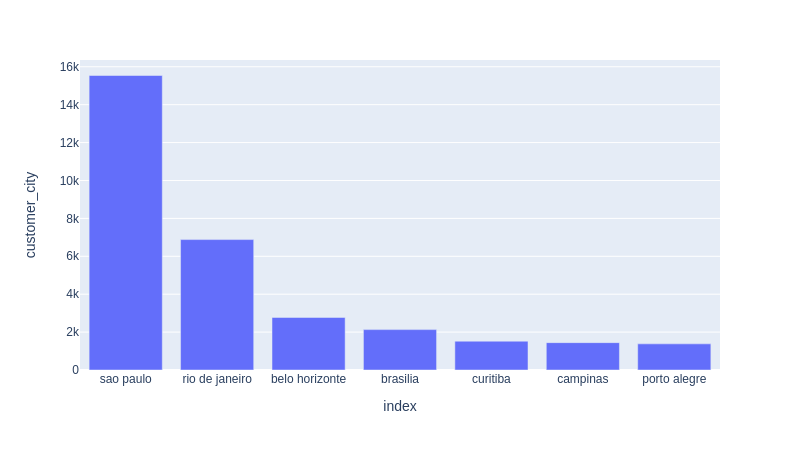

In [13]:
#Plotando o gráfico de compras por cidade
data = df_clientes.customer_city.value_counts().head(7).reset_index()

fig = px.bar(data, x='index', y='customer_city')
gitly.show( fig )

In [54]:
#Quantos clientes fizeram mais de uma compra?
df_group = df_clientes.groupby(by ="customer_unique_id").count()
df_clientesReincidentes = df_group[(df_group['customer_id']>=2)].sort_values(by = 'customer_id', ascending = False).reset_index()
print("Quantidade de clientes que fizeram mais de uma compra: ", df_clientesReincidentes.shape[0])
print(df_clientesReincidentes.head(10))

Quantidade de clientes que fizeram mais de uma compra:  2997
                 customer_unique_id  customer_id  ...  customer_city  customer_state
0  8d50f5eadf50201ccdcedfb9e2ac8455           17  ...             17              17
1  3e43e6105506432c953e165fb2acf44c            9  ...              9               9
2  1b6c7548a2a1f9037c1fd3ddfed95f33            7  ...              7               7
3  6469f99c1f9dfae7733b25662e7f1782            7  ...              7               7
4  ca77025e7201e3b30c44b472ff346268            7  ...              7               7
5  dc813062e0fc23409cd255f7f53c7074            6  ...              6               6
6  f0e310a6839dce9de1638e0fe5ab282a            6  ...              6               6
7  de34b16117594161a6a89c50b289d35a            6  ...              6               6
8  12f5d6e1cbf93dafd9dcc19095df0b3d            6  ...              6               6
9  47c1a3033b8b77b3ab6e109eb4d5fdf3            6  ...              6               6

[10

Esses valore contabilizam todas as compras. Por causa disso aparecem dados de mais de uma compra por cliente algumas vezes.

Vamos fazer a análise sem clientes repetidos.

In [48]:
df_clientesUnicos = df_clientes.drop_duplicates(subset=['customer_unique_id'])
df_clientesUnicos

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Observe que o número de linha bate com a quantidade que vimos anteriormente de quantidade de clientes únicos.

In [51]:
#Pegando as 7 cidades que mais realizaram compras
df_clientesUnicos.customer_city.value_counts().head(7).reset_index()

,index,customer_city
0,sao paulo,14971
1,rio de janeiro,6611
2,belo horizonte,2671
3,brasilia,2066
4,curitiba,1462
5,campinas,1397
6,porto alegre,1326


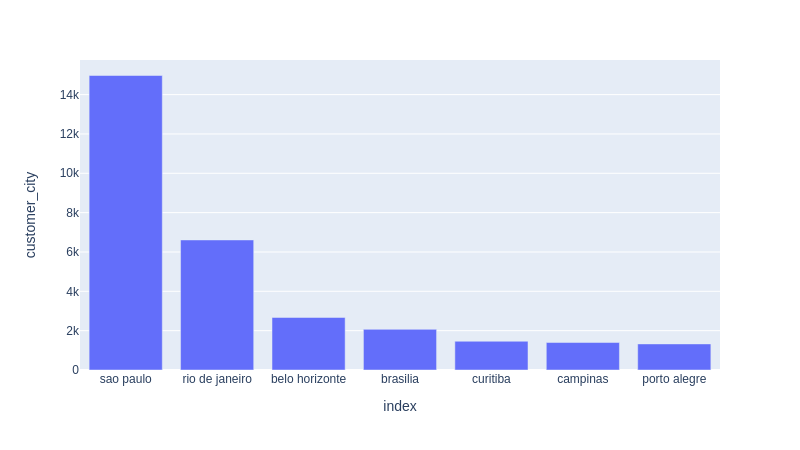

In [52]:
#Plotando o gráfico de compras por cidade
data = df_clientesUnicos.customer_city.value_counts().head(7).reset_index()

fig = px.bar(data, x='index', y='customer_city')
gitly.show( fig )

#Analisando o Dataset de geolocalização

In [128]:
#Primeiros 5 elementos do Dataset
df_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [105]:
#Tamanho do Dataset
df_geo.shape

(1000163, 5)

##Análise por estados que fizeram mais compras

In [129]:
#Qual a distribuição de compras por estados?
df_geo.geolocation_state.value_counts().reset_index()

,index,geolocation_state
0,SP,404268
1,MG,126336
2,RJ,121169
3,RS,61851
4,PR,57859
5,SC,38328
6,BA,36045
7,GO,20139
8,ES,16748
9,PE,16432


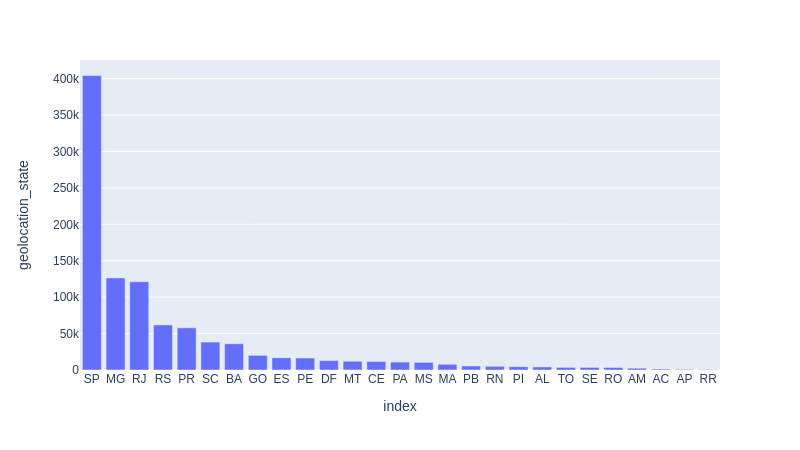

In [130]:
#Plotando o gráfico de compras por cidade
data = df_geo.geolocation_state.value_counts().reset_index()

fig = px.bar(data, x='index', y='geolocation_state')
gitly.show( fig )

Claramente observamos que o estado de São Paulo é onde foram realizadas mais compras

##Análise por cidade que faz mais compras

In [ ]:
#7 cidades que mais fizeram compras
df_geo.loc[(df_geo["geolocation_state"]=="SP"), ["geolocation_city"]].value_counts()


geolocation_city     
sao paulo                135799
são paulo                 24917
guarulhos                 11340
sao bernardo do campo      8112
osasco                     7658
                          ...  
bom fim do bom jesus          1
dolcinópolis                  1
paulistânia                   1
rubiao junior                 1
aparecida doeste              1
Length: 1048, dtype: int64

É evidente que a cidade de São Paulo é a campeã de compras em relação ao Brasil inteiro, mas também nota-se que existem cidades que estão escritas de formas diferentes. O prefixo do cep sempre corresponde a localização correta. Portanto é melhor fazer a análise por CEP para não ter dados incosistentes

##Análise pelo prefixo do CEP

**O primeiro dígito do cep corresponde a região do endereço:**

Região 0 - Grande São Paulo;

Região 1 - Interior de São Paulo;

Região 2 - Rio de Janeiro e Espírito Santo;

Região 3 - Minas Gerais;

Região 4 - Bahia e Sergipe;

Região 5 - Pernambuco, Alagoas, Paraíba e Rio Grande do Norte;

Região 6 - Ceará, Piauí, Maranhão, Pará, Amazonas, Acre, Amapá e Roraima;

Região 7 - Distrito Federal, Goiás, Tocantins, Mato Grosso, Mato Grosso do Sul e Rondônia;

Região 8 - Paraná e Santa Catarina;

Região 9 - Rio Grande do Sul.

**O Cep de São Paulo se distribui da seguinte maneira:**

1000 <= Centro < 2000

2000 <= Zona Norte < 3000

3000 <= Zona Leste < 4000 && 8000 <= Zona Leste < 8500

4000 <= Zona Sul < 5000

5000 <= Zona Oeste < 6000

6000 <= Grande São Paulo < 10000

11000 <= Litoral < 12000

10000 <= Interior <= 11000 && 12000 <= Interior < 20000



In [171]:
#Compras realizadas em São Paulo
ComprasSP = df_geo.loc[df_geo["geolocation_zip_code_prefix"]<20000].value_counts().sum()
print("Quantidade de compras realizadas em São Paulo: ", ComprasSP, "compras")

Quantidade de compras realizadas em São Paulo:  404270 compras


In [185]:
#Compras realizadas no região central de São Paulo
ComprasCentroSP = df_geo.loc[(df_geo["geolocation_zip_code_prefix"]>=1000) & (df_geo["geolocation_zip_code_prefix"]<2000)].value_counts().sum()
print("Quantidade de compras realizadas no Centro de São Paulo: ", ComprasCentroSP, "compras")

#Criação de uma lista para avaliar a quantidade em % de compras por região
PorcRegCompras = []
PorcRegCompras.append((ComprasCentroSP/ComprasSP)*100)
print(f"Porcentagem de compras realizadas no Centro de São Paulo em relação ao total do estado: {PorcRegCompras[0]:.2F}%")

Quantidade de compras realizadas no Centro de São Paulo:  19068 compras
Porcentagem de compras realizadas no Centro de São Paulo em relação ao total do estado: 4.72%


In [186]:
#Compras realizadas na zona norte de São Paulo
ComprasZN = df_geo.loc[(df_geo["geolocation_zip_code_prefix"]>=2000) & (df_geo["geolocation_zip_code_prefix"]<3000)].value_counts().sum()
print("Quantidade de compras realizadas na Zona Norte de São Paulo: ", ComprasZN, "compras")

PorcRegCompras.append((ComprasZN/ComprasSP)*100)
print(f"Porcentagem de compras realizadas na Zona Norte de São Paulo em relação ao total do estado: {PorcRegCompras[1]:.2F}%")

Quantidade de compras realizadas na Zona Norte de São Paulo:  22452 compras
Porcentagem de compras realizadas na Zona Norte de São Paulo em relação ao total do estado: 5.55%


In [187]:
#Compras realizadas na zona leste de São Paulo
ComprasZL = df_geo.loc[(df_geo["geolocation_zip_code_prefix"]>=3000) & (df_geo["geolocation_zip_code_prefix"]<4000)].value_counts().sum()
ComprasZL = ComprasZL + df_geo.loc[(df_geo["geolocation_zip_code_prefix"]>=8000) & (df_geo["geolocation_zip_code_prefix"]<8500)].value_counts().sum()
print("Quantidade de compras realizadas na Zona Leste de São Paulo: ", ComprasZL, "compras")

PorcRegCompras.append((ComprasZL/ComprasSP)*100)
print(f"Porcentagem de compras realizadas na Zona Leste de São Paulo em relação ao total do estado: {PorcRegCompras[2]:.2F}%")

Quantidade de compras realizadas na Zona Leste de São Paulo:  42064 compras
Porcentagem de compras realizadas na Zona Leste de São Paulo em relação ao total do estado: 10.40%


In [188]:
#Compras realizadas na zona sul de São Paulo
ComprasZS = df_geo.loc[(df_geo["geolocation_zip_code_prefix"]>=4000) & (df_geo["geolocation_zip_code_prefix"]<5000)].value_counts().sum()
print("Quantidade de compras realizadas na Zona Sul de São Paulo: ", ComprasZS, "compras")

PorcRegCompras.append((ComprasZS/ComprasSP)*100)
print(f"Porcentagem de compras realizadas na Zona Sul de São Paulo em relação ao total do estado: {PorcRegCompras[3]:.2F}%")

Quantidade de compras realizadas na Zona Sul de São Paulo:  42470 compras
Porcentagem de compras realizadas na Zona Sul de São Paulo em relação ao total do estado: 10.51%


In [189]:
#Compras realizadas na zona oeste de São Paulo
ComprasZO = df_geo.loc[(df_geo["geolocation_zip_code_prefix"]>=5000) & (df_geo["geolocation_zip_code_prefix"]<6000)].value_counts().sum()
print("Quantidade de compras realizadas na Zona Oeste de São Paulo: ", ComprasZO, "compras")

PorcRegCompras.append((ComprasZO/ComprasSP)*100)
print(f"Porcentagem de compras realizadas na Zona Oeste de São Paulo em relação ao total do estado: {PorcRegCompras[4]:.2F}%")

Quantidade de compras realizadas na Zona Oeste de São Paulo:  34669 compras
Porcentagem de compras realizadas na Zona Oeste de São Paulo em relação ao total do estado: 8.58%


In [190]:
#Compras realizadas no restante da Grande SP São Paulo
ComprasGSP = df_geo.loc[(df_geo["geolocation_zip_code_prefix"]>=6000) & (df_geo["geolocation_zip_code_prefix"]<10000)].value_counts().sum()
print("Quantidade de compras realizadas no restante da Grande SP São Paulo: ", ComprasGSP, "compras")

PorcRegCompras.append((ComprasGSP/ComprasSP)*100)
print(f"Porcentagem de compras realizadas no restante da Grande SP São Paulo em relação ao total do estado: {PorcRegCompras[5]:.2F}%")

Quantidade de compras realizadas no restante da Grande SP São Paulo:  97607 compras
Porcentagem de compras realizadas no restante da Grande SP São Paulo em relação ao total do estado: 24.14%


In [191]:
#Compras realizadas no litoral de São Paulo
ComprasLIT = df_geo.loc[(df_geo["geolocation_zip_code_prefix"]>=11000) & (df_geo["geolocation_zip_code_prefix"]<12000)].value_counts().sum()
print("Quantidade de compras realizadas no litoral de de São Paulo: ", ComprasLIT, "compras")

PorcRegCompras.append((ComprasLIT/ComprasSP)*100)
print(f"Porcentagem de compras realizadas no litoral de São Paulo em relação ao total do estado: {PorcRegCompras[6]:.2F}%")

Quantidade de compras realizadas no litoral de de São Paulo:  20770 compras
Porcentagem de compras realizadas no litoral de São Paulo em relação ao total do estado: 5.14%


In [192]:
#Compras realizadas no interior de São Paulo
ComprasINT = df_geo.loc[(df_geo["geolocation_zip_code_prefix"]>=10000) & (df_geo["geolocation_zip_code_prefix"]<11000)].value_counts().sum()
ComprasINT = ComprasINT + df_geo.loc[(df_geo["geolocation_zip_code_prefix"]>=12000) & (df_geo["geolocation_zip_code_prefix"]<20000)].value_counts().sum()
print("Quantidade de compras realizadas no interior de São Paulo: ", ComprasINT, "compras")

PorcRegCompras.append((ComprasINT/ComprasSP)*100)
print(f"Porcentagem de compras realizadas no interior de São Paulo em relação ao total do estado: {PorcRegCompras[7]:.2F}%")

Quantidade de compras realizadas no interior de São Paulo:  137767 compras
Porcentagem de compras realizadas no interior de São Paulo em relação ao total do estado: 34.08%


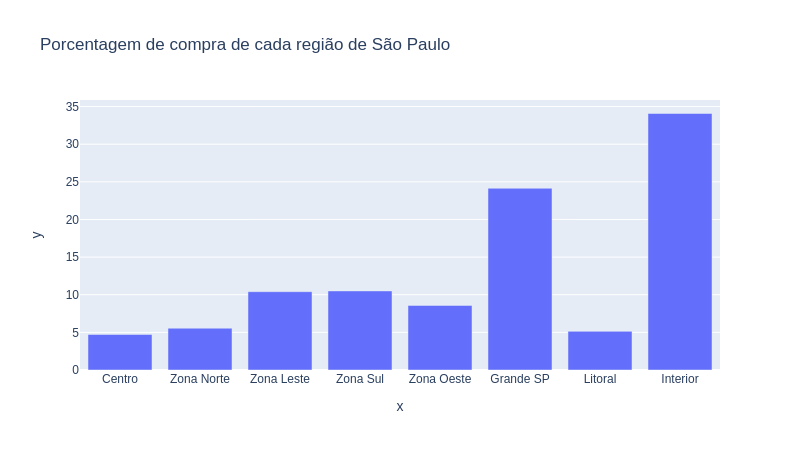

In [202]:
#Plotando o gráfico de compras em SP

fig = px.bar(x=['Centro', "Zona Norte", "Zona Leste", "Zona Sul", "Zona Oeste","Grande SP", "Litoral", "Interior" ], y=PorcRegCompras, title = "Porcentagem de compra de cada região de São Paulo")

gitly.show( fig )

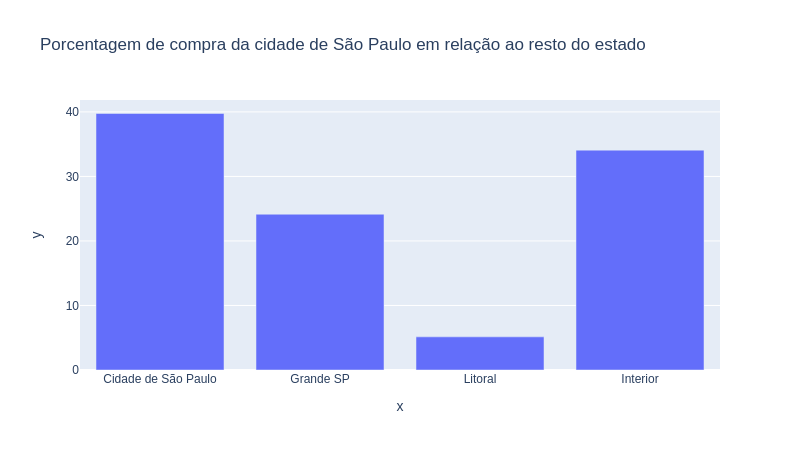

In [203]:
#Plotando o gráfico de compras em SP
Total = 0
for i in range(0, 5):
  Total = Total + PorcRegCompras[i]

Compras = [Total, PorcRegCompras[5], PorcRegCompras[6], PorcRegCompras[7]]
fig = px.bar(x=["Cidade de São Paulo","Grande SP", "Litoral", "Interior" ], y=Compras, title = "Porcentagem de compra da cidade de São Paulo em relação ao resto do estado")
gitly.show( fig )

#Analisando o Dataset de Itens Comprados

In [206]:
df_compra_itens.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


##Análises gerais

In [207]:
#Qual o tamanho desse dataset?
df_compra_itens.shape[0]

112650

In [213]:
#Quantos tipos de produtos existem?
df_compra_itens.product_id.unique().shape[0]

32951

In [215]:
#Qual produto vende mais?
df_compra_itens.product_id.value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
655427924aa82cda2749c647becca121      1
da77fdd937aba84787dbbba9231f79f8      1
80ba61cb89c5cc6f704b91b30fae834c      1
01c2e91674406ebaca6a1bbf7f61c3f0      1
66f2a9b44099e193e02f633ef51755fb      1
Name: product_id, Length: 32951, dtype: int64

In [216]:
#Qual a variação de preço dos produtos no Dataset?
df_compra_itens.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [217]:
#Qual a variação do preço do frete no Dataset?
df_compra_itens.freight_value.describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

In [234]:
#Quantos itens já foram comprados de uma vez?
df_compra_itens.order_item_id.max()

21

In [238]:
#Qual o vendedor que fechou mais vendas?
df_compra_itens.seller_id.value_counts()

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
babcc0ab201e4c60188427cae51a5b8b       1
a56a8043ebf66e42119618fb8cf232c6       1
22a23e5ac7061fc538cc2a019afaaf16       1
3f8247d0f772ffa58560e5c682521ad5       1
34aefe746cd81b7f3b23253ea28bef39       1
Name: seller_id, Length: 3095, dtype: int64

##Análise do produto mais vendido

In [227]:
#Gerando um dataset para o produto mais vendido
df_maisVendido = df_compra_itens.loc[df_compra_itens.product_id=="aca2eb7d00ea1a7b8ebd4e68314663af"]
df_maisVendido

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.00
619,016ff85737c2072ab00a705cd8f87799,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-09 11:19:25,75.0,20.02
643,017b1d6881222283afdc50baf3dcb0d5,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-15 02:10:45,69.9,17.40
1172,02b939dcd55f2b17680e10690deb08b5,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-08-11 11:30:16,75.0,13.08
1173,02b939dcd55f2b17680e10690deb08b5,2,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-08-11 11:30:16,75.0,13.08
...,...,...,...,...,...,...,...
112022,fe7d49cdcf690228d8d476caf24ef2d5,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-25 02:12:36,69.9,13.08
112027,fe802824215762b3ea5f49760eac0bd4,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-16 16:32:35,69.9,19.98
112028,fe802824215762b3ea5f49760eac0bd4,2,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-16 16:32:35,69.9,19.98
112212,feec317d7127a4dc69cfb507f08c8759,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-13 03:50:28,69.9,35.85


In [231]:
#Qual a variação de preço do item mais vendido?
df_maisVendido.price.describe()

count    527.000000
mean      71.364137
std        3.670723
min       69.900000
25%       69.900000
50%       69.900000
75%       69.900000
max      109.900000
Name: price, dtype: float64

In [232]:
#Qual a variação de frete do item mais vendido?
df_maisVendido.freight_value.describe()

count    527.000000
mean      13.684744
std        7.894240
min        0.000000
25%       12.430000
50%       13.080000
75%       19.980000
max       35.850000
Name: freight_value, dtype: float64

In [230]:
#É sempre o mesmo vendedor?
df_maisVendido.seller_id.unique()

array(['955fee9216a65b617aa5c0531780ce60'], dtype=object)

In [235]:
#Quantos desse produto já foram comprados de uma vez?
df_maisVendido.order_item_id.max()

4

In [236]:
#Houve um desconto nesse caso?
df_maisVendido.loc[df_maisVendido.order_item_id==4]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
69255,9e22b00fd1b9f036577e8c517ea0a5d4,4,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-12-08 13:52:24,75.0,20.02
82740,bbeea8dfee8c14c1cf2d53c17971b6c6,4,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-03 22:50:26,69.9,12.43


Ele mostra sempre o preço unitário de venda

##Análise do vendedor que fechou mais vendas

In [240]:
#Fazendo um novo Dataset para estudar esse vendedor
df_melhorVendedor = df_compra_itens.loc[df_compra_itens.seller_id=="6560211a19b47992c3666cc44a7e94c0"]
df_melhorVendedor

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
23,001021efaa8636c29475e7734483457d,1,5d7c23067ed3fc8c6e699b9373d5890b,6560211a19b47992c3666cc44a7e94c0,2018-03-05 09:35:41,49.0,15.10
117,00418a49a685c6bb60633291c3fab17a,1,5e21d5cab5d33e770d8150a4ee6117db,6560211a19b47992c3666cc44a7e94c0,2017-10-09 20:50:45,49.0,7.78
148,005a1dded353107dbabf8ffc83a20365,1,7e6c4a0bf900e259f50ba63331fd2785,6560211a19b47992c3666cc44a7e94c0,2018-02-15 18:10:50,75.0,14.28
175,006e05e81c068ddc38e48ebe189b922e,1,02475368dfb38934fe55f574024fe1d7,6560211a19b47992c3666cc44a7e94c0,2018-01-03 22:07:25,29.0,14.10
182,00750f68bb64537034e93554c64b41b5,1,526f833e1eb0a32ad9351145a761b9ab,6560211a19b47992c3666cc44a7e94c0,2017-11-17 10:10:32,129.0,8.16
...,...,...,...,...,...,...,...
112252,ff030caf873f5d7290581e2ba5d3fd7f,1,1600dcf1cea8c0c83702e07b577ab231,6560211a19b47992c3666cc44a7e94c0,2017-06-16 14:25:15,44.0,11.85
112310,ff269db61cf306545ee8f5ada41a4a3f,1,e06f99e79036d681effa3de75989bf22,6560211a19b47992c3666cc44a7e94c0,2017-09-25 15:44:17,59.0,15.16
112539,ffbb04002876c95ff079b7b4df8eee28,1,7e48d9554094858ee2269c4ef809f50e,6560211a19b47992c3666cc44a7e94c0,2018-06-27 19:54:05,45.0,15.42
112541,ffbcdac3da2c2f23b699666818b0d38c,1,cce55549bb816a12eba7ddfd637a961d,6560211a19b47992c3666cc44a7e94c0,2018-06-21 18:56:49,78.0,18.65


In [241]:
#Quantos produtos diferentes ele vende?
df_melhorVendedor.product_id.unique().shape[0]

256

In [242]:
#Qual o produto dele que vende mais?
df_melhorVendedor.product_id.value_counts()

a92930c327948861c015c919a0bcb4a8    160
d017a2151d543a9885604dc62a3d9dcc    140
2136c70bbe723d338fab53da3c03e6dc     89
c3ba4e8d3cb30049213b682e751e9d00     58
dc52f0f5d3ec37a93eaf956cde4e5d2c     39
                                   ... 
39478306951bbc2bdafa47682ce2ea10      1
0d9f729c5dea994b9072004fd2656cc3      1
140048a7ca8c50c44a58532471837660      1
b3bce4552b02817249347cc257c9e61a      1
74903af00140072f48c7da1cd4984f88      1
Name: product_id, Length: 256, dtype: int64

In [245]:
#Qual os preços dele variam quanto?
df_melhorVendedor.price.describe()

count    2033.000000
mean       60.651663
std        33.653670
min        16.000000
25%        44.000000
50%        49.000000
75%        69.000000
max       249.000000
Name: price, dtype: float64

In [247]:
#Por quanto vende o produto mais vendido?
df_melhorVendedor.loc[df_melhorVendedor.product_id=="a92930c327948861c015c919a0bcb4a8"].sort_values(by='price')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
58627,8572e18216437c86715d1e5a52321408,1,a92930c327948861c015c919a0bcb4a8,6560211a19b47992c3666cc44a7e94c0,2018-08-27 23:44:19,77.0,15.64
26048,3b3e0d7f5d77e227da21f19fd5e20c47,1,a92930c327948861c015c919a0bcb4a8,6560211a19b47992c3666cc44a7e94c0,2018-08-23 09:10:48,77.0,7.80
56899,81710e0039b0dcda11c1f114e3dda5cf,1,a92930c327948861c015c919a0bcb4a8,6560211a19b47992c3666cc44a7e94c0,2018-08-24 18:24:18,77.0,13.20
41682,5f071a8534fb6805fa6ec902f04219e4,1,a92930c327948861c015c919a0bcb4a8,6560211a19b47992c3666cc44a7e94c0,2018-08-22 20:50:06,77.0,15.64
36419,529a65336debb1c3e3327d7d67dc733d,1,a92930c327948861c015c919a0bcb4a8,6560211a19b47992c3666cc44a7e94c0,2018-08-24 19:04:29,77.0,18.64
...,...,...,...,...,...,...,...
44058,6424ddd05ffee73de1df9f8f9d1bfc25,1,a92930c327948861c015c919a0bcb4a8,6560211a19b47992c3666cc44a7e94c0,2018-07-24 00:23:14,78.0,13.21
44379,64da8ff64967de481400af6d6c0b059a,1,a92930c327948861c015c919a0bcb4a8,6560211a19b47992c3666cc44a7e94c0,2018-06-18 02:57:37,78.0,22.48
44879,6610d1b2f774539f028cc2850a795657,1,a92930c327948861c015c919a0bcb4a8,6560211a19b47992c3666cc44a7e94c0,2017-08-17 17:46:18,78.0,25.83
38899,586beaa2e8ffefdedcba61bfabb0c9d4,1,a92930c327948861c015c919a0bcb4a8,6560211a19b47992c3666cc44a7e94c0,2018-06-28 05:31:29,78.0,7.81


In [250]:
#Ele faz vendas simultâneas?
df_melhorVendedor.loc[df_melhorVendedor.order_item_id>1].sort_values('order_item_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1427,034afd1b074e35a1d1dcf70c4a5641b5,2,87cb507e0daa37bbf34956fd59eba832,6560211a19b47992c3666cc44a7e94c0,2017-12-06 22:54:29,29.0,7.78
74668,aa0f5120dbd7776eb7289031e22a8329,2,7703b8cb5b77fbb36518ea91e2ca734f,6560211a19b47992c3666cc44a7e94c0,2017-11-30 04:29:58,39.0,14.10
74792,aa61ca4def1d3385bafe461f6ef46faa,2,380b4664ba5bb18cc9db78ee6bac3558,6560211a19b47992c3666cc44a7e94c0,2017-03-03 20:41:57,37.0,10.96
75562,ac13d782734edd6b595ba54850c1431f,2,38b5079a807bb9f22ddfa46f929accee,6560211a19b47992c3666cc44a7e94c0,2018-07-26 04:25:26,21.0,15.25
76060,ad27fd2d88f7a006c5629cab52082a8d,2,2136c70bbe723d338fab53da3c03e6dc,6560211a19b47992c3666cc44a7e94c0,2017-10-31 13:06:05,29.0,2.56
...,...,...,...,...,...,...,...
102510,e8bf6d7173ae20431feec1819bb00fec,4,2f70195374f6c3d3c6542edf5bd17c8c,6560211a19b47992c3666cc44a7e94c0,2017-07-21 15:45:11,49.0,7.78
10276,178dc9ffc66f1968787b253a9318cc29,4,060f0122cdc8f25db4a0d7359fdae7b0,6560211a19b47992c3666cc44a7e94c0,2018-08-08 11:05:11,49.0,13.87
19304,2c52a5a630ca9e849ec5fad8932bab44,4,7dac8901a50cf3317d5372cbd3186ecd,6560211a19b47992c3666cc44a7e94c0,2017-03-23 14:41:46,29.0,5.00
19305,2c52a5a630ca9e849ec5fad8932bab44,5,7703b8cb5b77fbb36518ea91e2ca734f,6560211a19b47992c3666cc44a7e94c0,2017-03-23 14:41:46,39.0,10.00


##Análise do produto mais caro de todos

In [255]:
#Qual produto que é?
df_compra_itens.loc[df_compra_itens.price==6735]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31


In [256]:
#Foi comprado mais de uma vez?
df_compra_itens.loc[df_compra_itens.product_id=='489ae2aa008f021502940f251d4cce7f']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31


In [257]:
#O vendedor vendeu outros produtos?
df_compra_itens.loc[df_compra_itens.seller_id=='e3b4998c7a498169dc7bce44e6bb6277']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
41222,5de59551c282b892ae9ff238fd557145,1,679804d4938f8bf53025298b725f2eb6,e3b4998c7a498169dc7bce44e6bb6277,2017-01-20 16:24:13,32.9,10.96
77358,b017dafe7c59c8aaf92ab3fa1ca54d78,1,4bf205e4dc4e2c6b258e1ec0e2be9367,e3b4998c7a498169dc7bce44e6bb6277,2017-01-30 16:16:15,130.0,11.52


##Análise do produto com maior frete

In [259]:
#Qual produto foi? Seu preço?
df_compra_itens.loc[df_compra_itens.freight_value==409.68]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.0,409.68


In [260]:
#O produto já foi vendido outras vezes?
df_compra_itens.loc[df_compra_itens.product_id=='ec31d2a17b299511e7c8627be9337b9b']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.0,409.68


In [261]:
#E quanto ao vendedor?
df_compra_itens.loc[df_compra_itens.seller_id=='257e61d3251fb5efb9daadddbc2cf7ca']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
8297,12e253a6a65d9b9dc662a314f8c72fae,1,618c65cb5359281b2c830b9f3f2e1f36,257e61d3251fb5efb9daadddbc2cf7ca,2018-08-09 21:31:15,219.0,19.58
14680,21787a9b049d1651878b1a9bb3fec657,1,a68149d568e07ca72477faf0b10906e1,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-12 17:30:23,299.0,19.92
20894,2fce099f5a86120f303904a36cf648bf,1,8994237d820597beb5dc3cd977f6bbd5,257e61d3251fb5efb9daadddbc2cf7ca,2018-06-18 13:04:40,479.0,27.29
46924,6aa40159104472e7b1ba3ea38cc2c817,1,cf5f0f6ba7c1477ba6aca74da24faba5,257e61d3251fb5efb9daadddbc2cf7ca,2018-05-22 20:35:15,749.0,77.79
50239,7229fca9b269915fc63b44434d20828a,1,310806337e8a62be35203aa25d302b08,257e61d3251fb5efb9daadddbc2cf7ca,2018-08-21 16:25:27,1999.0,99.40
54511,7be3a5089c1dc43a6943bfb89a249b8c,1,ff7885ae23429394b64526e957ec809d,257e61d3251fb5efb9daadddbc2cf7ca,2018-07-30 20:24:19,890.0,81.03
64212,92b4d74d8984ddfd468fba03281fec49,1,050ab8e1f87a468de0eed97451da3efd,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-23 12:30:20,449.0,127.51
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.0,409.68
82395,bb319a363d19dd79207dd26bacf0f4e8,1,416f17a4b2a56dd33d7d4f4d15570326,257e61d3251fb5efb9daadddbc2cf7ca,2018-05-15 08:30:42,279.0,24.72
100453,e3c2bd85842c8c1e31ed960eea5fa85c,1,ad0bb547c950431dae08e48803ff6dad,257e61d3251fb5efb9daadddbc2cf7ca,2018-08-03 16:24:56,289.0,101.63


In [264]:
#Organizando essa lista por preço
df_compra_itens.loc[df_compra_itens.seller_id=='257e61d3251fb5efb9daadddbc2cf7ca'].sort_values(by='price', ascending = False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
50239,7229fca9b269915fc63b44434d20828a,1,310806337e8a62be35203aa25d302b08,257e61d3251fb5efb9daadddbc2cf7ca,2018-08-21 16:25:27,1999.0,99.40
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.0,409.68
54511,7be3a5089c1dc43a6943bfb89a249b8c,1,ff7885ae23429394b64526e957ec809d,257e61d3251fb5efb9daadddbc2cf7ca,2018-07-30 20:24:19,890.0,81.03
46924,6aa40159104472e7b1ba3ea38cc2c817,1,cf5f0f6ba7c1477ba6aca74da24faba5,257e61d3251fb5efb9daadddbc2cf7ca,2018-05-22 20:35:15,749.0,77.79
104914,ee566492cc1da11a68b09dae37eb73ce,1,8c4ab7a3aaeb4de7eb2743401f66f986,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-19 13:15:26,549.0,40.99
110088,fa2b7f457f0624bb344dc3023f557d7e,1,86affbe24eda560b9bba0e36f87bdbfe,257e61d3251fb5efb9daadddbc2cf7ca,2018-08-09 22:50:16,549.0,47.64
20894,2fce099f5a86120f303904a36cf648bf,1,8994237d820597beb5dc3cd977f6bbd5,257e61d3251fb5efb9daadddbc2cf7ca,2018-06-18 13:04:40,479.0,27.29
64212,92b4d74d8984ddfd468fba03281fec49,1,050ab8e1f87a468de0eed97451da3efd,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-23 12:30:20,449.0,127.51
14680,21787a9b049d1651878b1a9bb3fec657,1,a68149d568e07ca72477faf0b10906e1,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-12 17:30:23,299.0,19.92
100453,e3c2bd85842c8c1e31ed960eea5fa85c,1,ad0bb547c950431dae08e48803ff6dad,257e61d3251fb5efb9daadddbc2cf7ca,2018-08-03 16:24:56,289.0,101.63


In [269]:
#Quanto esse vendedor já ganhou?
df_compra_itens.loc[df_compra_itens.seller_id=='257e61d3251fb5efb9daadddbc2cf7ca'].sort_values(by='price').sum()

order_id               12e253a6a65d9b9dc662a314f8c72faebb319a363d19dd...
order_item_id                                                         12
product_id             618c65cb5359281b2c830b9f3f2e1f36416f17a4b2a56d...
seller_id              257e61d3251fb5efb9daadddbc2cf7ca257e61d3251fb5...
shipping_limit_date    2018-08-09 21:31:152018-05-15 08:30:422018-08-...
price                                                               7729
freight_value                                                    1077.18
dtype: object

#Analisando o Dataset de Pagamentos

In [274]:
df_compra_pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [298]:
#Qual o tamalho do Dataset?
df_compra_pagamentos.shape[0]

103886

In [275]:
#Tipos de pagamento
df_compra_pagamentos.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [285]:
#Em até quantas parcelas ocorreram o pagamento?
sorted(df_compra_pagamentos.payment_installments.unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24]

In [286]:
#Qual o intervalo de preço que foi pago?
df_compra_pagamentos.payment_value.describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [287]:
#qual venda foi de graça?
df_compra_pagamentos.loc[df_compra_pagamentos.payment_value==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [300]:
#Qual o tipo de pagamento mais utilizado?
df_compra_pagamentos.groupby(by='payment_type').size().sort_values()

payment_type
not_defined        3
debit_card      1529
voucher         5775
boleto         19784
credit_card    76795
dtype: int64

In [307]:
#Qual foi a maior compra com cartão de crédito?
df_compra_pagamentos.loc[df_compra_pagamentos.payment_type=='credit_card'].sort_values(by = 'payment_value', ascending=False).head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08


In [306]:
#Qual foi a maior compra com cartão de debito?
df_compra_pagamentos.loc[df_compra_pagamentos.payment_type=='debit_card'].sort_values(by = 'payment_value', ascending=False).head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
91368,d2f270487125ddc41fd134c4003ad1d7,1,debit_card,1,4445.5


In [308]:
#Qual foi a maior compra com boleto?
df_compra_pagamentos.loc[df_compra_pagamentos.payment_type=='boleto'].sort_values(by = 'payment_value', ascending=False).head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88


In [309]:
#Qual foi a maior compra com voucher?
df_compra_pagamentos.loc[df_compra_pagamentos.payment_type=='voucher'].sort_values(by = 'payment_value', ascending=False).head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
78900,03310aa823a66056268a3bab36e827fb,1,voucher,1,3184.34


In [311]:
#o que são essas compras com "Not_defined"?
df_compra_pagamentos.loc[df_compra_pagamentos.payment_type=='not_defined'].sort_values(by = 'payment_value', ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


#Analizando o Dataset de Avaliações

In [312]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#Analizando o Dataset de Compras

In [313]:
df_compras.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#Analizando o Dataset de Produtos

In [314]:
df_produtos.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#Analizando o Dataset de Vendedores

In [315]:
df_vendedores.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
